In [31]:
import os, sys
import numpy as np
import healpy as hp
import pandas as pd
import h5py
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

os.system('module load texlive/2022')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times",
    "font.size"  : 13
})

matplotlib.rcParams.update({'font.size': 15})

matplotlib.rcParams['mathtext.fontset'] = 'stix'
plt.rc('text.latex', preamble=r'\usepackage{/global/cfs/cdirs/lsst/groups/WL/users/yomori/repo/nulltests_txpipe/apjfonts}')
        
#plt.rcParams["font.family"] = "Times New Roman"

plt.rcParams['axes.facecolor']   = 'w'
plt.rcParams['figure.facecolor'] = 'w'


kidscol = '#9CC363'    # light olive
descol  = 'chocolate'  # dark orange
hsccol  = '#5A8BAF'    # lightpurple

Lmod has detected the following error: The following module(s) are unknown:
"texlive/2022"

Please check the spelling or version number. Also try "module spider ..."
It is also possible your cache file is out-of-date; it may help to try:
  $ module --ignore_cache load "texlive/2022"

Also make sure that all modulefiles written in TCL start with the string
#%Module





# Footprint

In [33]:
#kids=hp.read_map('/lcrc/project/SPT3G/users/ac.yomori/projects/nulltest/masks/mask_kids1000.fits',partial=True)
import h5py

kids=np.zeros(hp.nside2npix(128))
#with h5py.File('/global/cfs/cdirs/lsst/groups/WL/users/yomori/repo/txpipe/testbb/data/kids/outputs/meansubperfield/source_maps.hdf5', "r") as f:
with h5py.File('/pscratch/sd/j/jjeffers/temp/TXPipe/data/kids/GTStar/source_maps.hdf5','r') as f:
    print(f['maps'].keys())
    #c=f['maps']['count_2D'][:]
    px  = f['maps']['count_2D']['pixel'][:]
    val = f['maps']['count_2D']['value'][:]
    print(np.shape(px),np.shape(val),np.shape(kids))
    print(np.shape(kids[px]))
kids[px]=val
#kids=hp.ud_grade(kids,power=-2,nside_out=128)
kids[kids>0]=1   
#kids[kids<=0]=hp.UNSEEN 
    

hsc=np.zeros(hp.nside2npix(1024))
with h5py.File('/global/cfs/cdirs/lsst/groups/WL/users/yomori/repo/txpipe/testbb/data/hsc-y3/outputs/shearsys/source_maps.hdf5', "r") as f:
    #c=f['maps']['count_2D'][:]
    px  = f['maps']['count_2D']['pixel'][:]
    val = f['maps']['count_2D']['value'][:]
    print(np.shape(px),np.shape(val),np.shape(hsc))
    print(np.shape(hsc[px]))
hsc[px]=val  
hsc=hp.ud_grade(hsc,power=-2,nside_out=128)
hsc[hsc>0]=1 
#hsc[hsc<=0]=hp.UNSEEN 

des=np.zeros(hp.nside2npix(128))
with h5py.File('/global/cfs/cdirs/lsst/groups/WL/users/yomori/repo/txpipe/testbb/data/desy3a/outputs/source_maps.hdf5', "r") as f:
    #c=f['maps']['count_2D'][:]
    px  = f['maps']['count_2D']['pixel'][:]
    val = f['maps']['count_2D']['value'][:]
    print(np.shape(px),np.shape(val),np.shape(des))
des[px]=val  
des=hp.ud_grade(des,power=-2,nside_out=128)
des[des>0]=1 
#des[des<=0] = hp.UNSEEN


<KeysViewHDF5 ['count_0', 'count_1', 'count_2', 'count_2D', 'count_3', 'count_4', 'g1_0', 'g1_1', 'g1_2', 'g1_2D', 'g1_3', 'g1_4', 'g2_0', 'g2_1', 'g2_2', 'g2_2D', 'g2_3', 'g2_4', 'lensing_weight_0', 'lensing_weight_1', 'lensing_weight_2', 'lensing_weight_2D', 'lensing_weight_3', 'lensing_weight_4', 'var_e_0', 'var_e_1', 'var_e_2', 'var_e_2D', 'var_e_3', 'var_e_4', 'var_g1_0', 'var_g1_1', 'var_g1_2', 'var_g1_2D', 'var_g1_3', 'var_g1_4', 'var_g2_0', 'var_g2_1', 'var_g2_2', 'var_g2_2D', 'var_g2_3', 'var_g2_4']>
(5176,) (5176,) (196608,)
(5176,)
(145505,) (145505,) (12582912,)
(145505,)
(24202,) (24202,) (196608,)


In [40]:
np.shape(des[des<=0])

(172406,)

In [41]:
des[des<=0]

array([0., 0., 0., ..., 0., 0., 0.])

In [30]:
print(np.shape(px[:]),np.shape(kids[:]))

(286497,) (3145728,)


In [9]:
print(np.shape(px),np.shape(val))

(24202,) (24202,)


In [19]:
196608/286497

0.6862480235395135

In [31]:
286497/145505

1.9689838837153362

In [20]:
12582912/145505

86.4775231091715

In [18]:
196608/24202

8.123626146599454

In [ ]:
np.shape(hsc[])

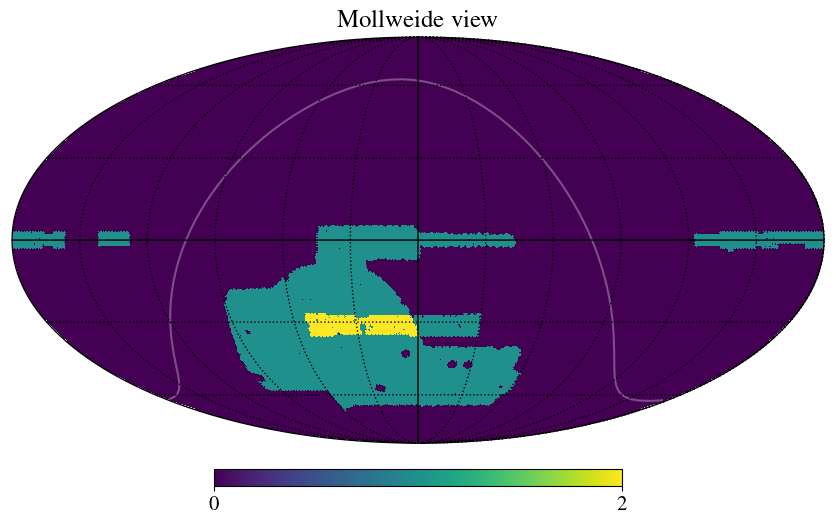

In [3]:
hp.mollview(des+kids)

from astropy.coordinates import SkyCoord
import astropy.units as u

def rd2tp(ra,dec):
    """
    Convert ra,dec -> tht,phi
    """
    tht = (-dec+90.0)/180.0*np.pi
    phi = ra/180.0*np.pi
    return tht,phi
dec = np.asarray([0.]*100)
ra  = np.arange(0, 360, 3.6)


gc = SkyCoord(l=ra*u.degree, b=dec*u.degree, frame='galactic')
raC=gc.fk5.ra.value
decC=gc.fk5.dec.value

tht,phi=rd2tp(raC,decC)

hp.projplot(raC,decC, 'white', lw=1.5,coord='G',lonlat=True,alpha=0.3)
hp.graticule()


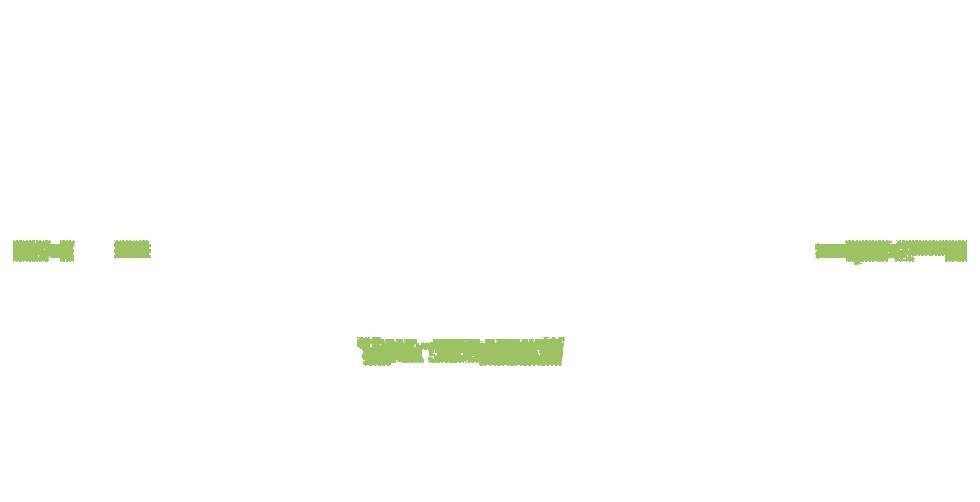

In [49]:
# KiDS-1000
import matplotlib.colors as mcolors
fig=plt.figure(figsize=(10,6))
plt.rcParams['axes.facecolor']='None'
plt.rcParams['savefig.facecolor']='None'
hp.graticule(lw=0.2,alpha=0.2,dpar=30,dmer=30)

#colors = [(0.25,0.75,0,c) for c in np.linspace(0,0.5,100)]
#cmaporange = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=5)



cvals  = [0,1]
colors = ["w",kidscol]
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmapkids = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)
cmapkids.set_under('k', alpha=0)
cmapkids.set_bad('k', alpha=0)

hp.mollview(kids,badcolor='None',hold=True,cmap=cmapkids,fig=fig,alpha=kids,cbar=False,title=None)
#hp.graticule()
fig.patch.set_alpha(0.0)
plt.gca().patch.set_alpha(0.0)
plt.gca().set_facecolor("orange")
plt.savefig('footprint_kids.png',transparent=True,facecolor='None',bbox_inches='tight',dpi=400)

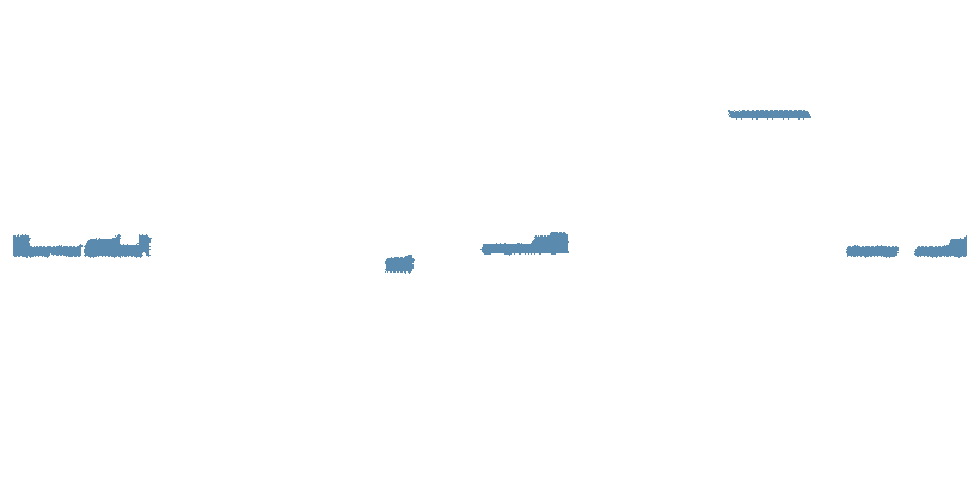

In [50]:
# HSC-Y3
import matplotlib.colors as mcolors
fig=plt.figure(figsize=(10,6))
#hp.mollview(desy3,badcolor='None',hold=True,cmap=cmapblue,fig=fig,)
hp.graticule(lw=0.2,alpha=0.2,dpar=30,dmer=30)

plt.rcParams['axes.facecolor']='None'
plt.rcParams['savefig.facecolor']='None'


cvals  = [0,1]
colors = ["w",hsccol]
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmaphsc = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)
cmaphsc.set_under('k', alpha=0)
cmaphsc.set_bad('k', alpha=0)

#aa=np.ones_like(desy1)*hp.UNSEEN
hp.mollview(hsc,badcolor='None',hold=True,cmap=cmaphsc,fig=fig,alpha=hsc,cbar=False,title=None)
#hp.graticule(lw=0.1,alpha=0.4,dpar=30,dmer=30)
fig.patch.set_alpha(0.0)
plt.gca().patch.set_alpha(0.0)
plt.gca().set_facecolor("orange")
plt.savefig('footprint_hsc.png',transparent=True,facecolor='None',bbox_inches='tight',dpi=400)

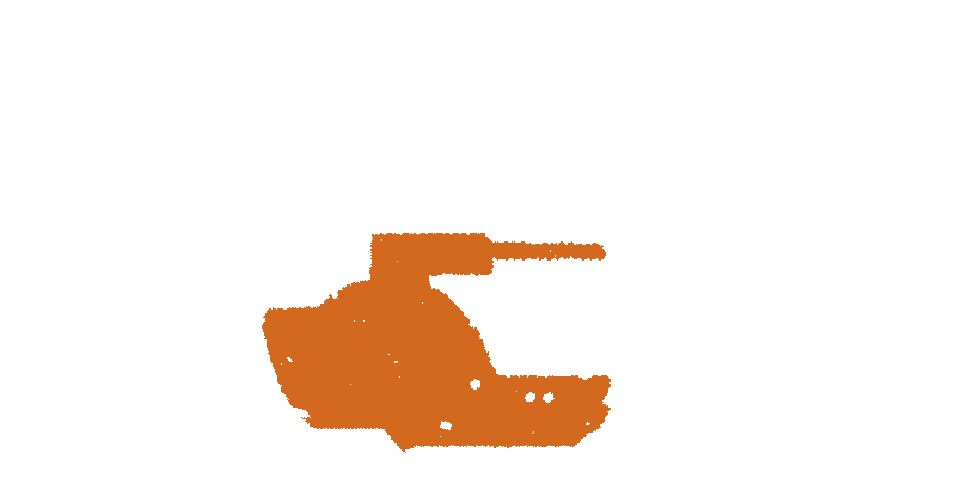

In [48]:
# HSC-Y3
fig.clf()
import matplotlib.colors as mcolors
fig=plt.figure(figsize=(10,6))
#hp.mollview(desy3,badcolor='None',hold=True,cmap=cmapblue,fig=fig,)
hp.graticule(lw=0.2,alpha=0.2,dpar=30,dmer=30)

plt.rcParams['axes.facecolor']='None'
plt.rcParams['savefig.facecolor']='None'


cvals  = [0,1]
colors = ["w",descol]
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmapdes = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)
cmapdes.set_under('k', alpha=0)
cmapdes.set_bad('k', alpha=0)

#aa=np.ones_like(desy1)*hp.UNSEEN
hp.mollview(des,badcolor='None',hold=True,cmap=cmapdes,fig=fig,alpha=des,cbar=False,title=None)
hp.projplot(raC,decC, 'dimgray', lw=1.5,lonlat=True,alpha=0) #coord='G'

#hp.graticule(lw=0.1,alpha=0.4,dpar=30,dmer=30)
fig.patch.set_alpha(0.0)
plt.gca().patch.set_alpha(0.0)
plt.gca().set_facecolor("orange")
'''
plt.gca().text(0.33,-0.10,'KiDS-1000',transform=plt.gca().transAxes,ha='center',fontsize=17)
plt.gca().text(0.53,-0.10,'DES-Y3'   ,transform=plt.gca().transAxes,ha='center',fontsize=17)
plt.gca().text(0.73,-0.10,'HSC-Y3'      ,transform=plt.gca().transAxes,ha='center',fontsize=17)
plt.gca().annotate('', xy=(0.215, -0.085), xytext=(0.265,-0.085 ),xycoords='axes fraction',
            arrowprops=dict(facecolor=kidscol,edgecolor=kidscol,headwidth=0,headlength=0.001,alpha=0.7),fontsize=20
            )

plt.gca().annotate('', xy=(0.43, -0.085), xytext=(0.48,-0.085 ),xycoords='axes fraction',
            arrowprops=dict(facecolor=descol,edgecolor=descol,headwidth=0,headlength=0.001,alpha=1),fontsize=20            )

plt.gca().annotate('', xy=(0.63, -0.085), xytext=(0.68,-0.085 ),xycoords='axes fraction',
            arrowprops=dict(facecolor=hsccol,edgecolor=hsccol,headwidth=0,headlength=0.001,alpha=0.7),fontsize=20
            )
'''
fig.show()
plt.savefig('footprint_des.png',transparent=True,facecolor='None',bbox_inches='tight',dpi=400)

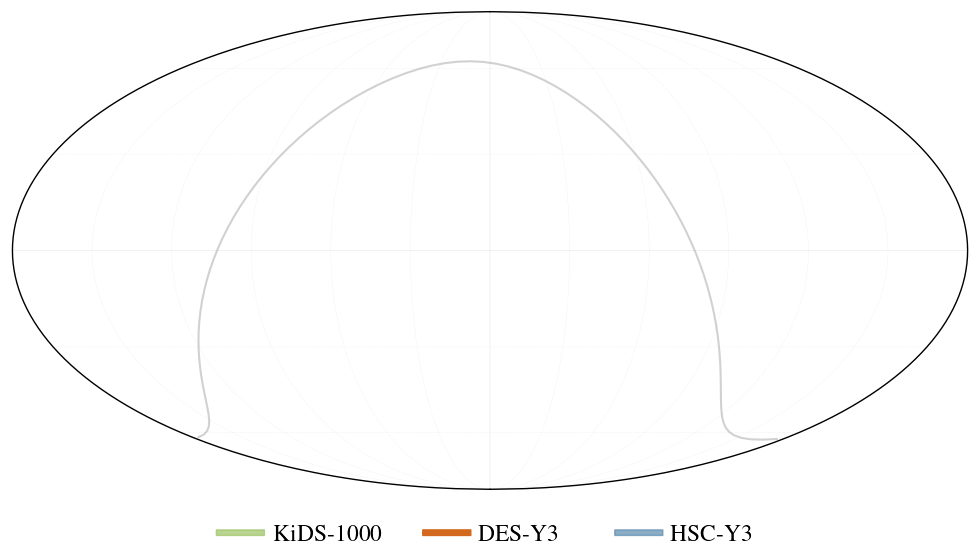

In [51]:
from astropy.coordinates import SkyCoord
import astropy.units as u
fig.clf()
def rd2tp(ra,dec):
    """
    Convert ra,dec -> tht,phi
    """
    tht = (-dec+90.0)/180.0*np.pi
    phi = ra/180.0*np.pi
    return tht,phi
    
fig=plt.figure(figsize=(10,6))
#hp.mollview(desy3,badcolor='None',hold=True,cmap=cmapblue,fig=fig,)

hp.graticule(lw=0.2,alpha=0.2,dpar=30,dmer=30)

plt.rcParams['axes.facecolor']='None'
plt.rcParams['savefig.facecolor']='None'
'''
cmap = cm.bwr
cmap.set_under('r',alpha=0.1)
cmap.set_bad('r',alpha=0.1)

#aa=np.ones_like(desy1)*hp.UNSEEN
hp.mollview(desy3*0,badcolor='None',hold=True,cmap='binary',fig=fig,alpha=desy3,cbar=False,title=None)
'''

'''
cvals  = [0,1]
colors = ["w",descol]
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmapdes = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)
cmapdes.set_under('k', alpha=0)
cmapdes.set_bad('k', alpha=0)
hp.mollview(des*0.8,badcolor='None',hold=True,cmap='binary',fig=fig,cbar=False,title=None)
''';


fig.patch.set_alpha(0.0)
plt.gca().patch.set_alpha(0.0)
plt.gca().set_facecolor("orange")


dec = np.asarray([0.]*100)
ra  = np.arange(0, 360, 3.6)


gc = SkyCoord(l=ra*u.degree, b=dec*u.degree, frame='galactic')
raC=gc.fk5.ra.value
decC=gc.fk5.dec.value

tht,phi=rd2tp(raC,decC)
#hp.newvisufunc.projview(m=kids,hold=True,fig=fig,cbar=False,title=None) #badcolor='None',cmap=cmapkids,alpha=kids,
#hp.newvisufunc.projview(m=des,hold=True,fig=fig,cbar=False,title=None) #badcolor='None',map=cmapdes,alpha=des,
#hp.newvisufunc.projview(m=hsc,hold=True,fig=fig,cbar=False,title=None) #badcolor='None',cmap=cmaphsc,alpha=hsc,
hp.projplot(raC,decC, 'dimgray', lw=1.5,lonlat=True,alpha=0.3) #coord='G'

#plt.gca().text(0.2,-0.10,'DES-Y1'   ,transform=plt.gca().transAxes,ha='center',fontsize=15)
plt.gca().text(0.33,-0.10,'KiDS-1000',transform=plt.gca().transAxes,ha='center',fontsize=17)
plt.gca().text(0.53,-0.10,'DES-Y3'   ,transform=plt.gca().transAxes,ha='center',fontsize=17)
plt.gca().text(0.73,-0.10,'HSC-Y3'      ,transform=plt.gca().transAxes,ha='center',fontsize=17)
#hp.graticule(lw=0.2,alpha=0.2,dpar=30,dmer=30)
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
#box = Rectangle((0.15, -0.1), 0.05, 0.05)
#pc  = PatchCollection(box, facecolor='r', alpha=0.5)
#plt.gca().add_collection(box,transform=plt.gca().transAxes)

#p = Rectangle((0.0, -0.05), 0.05, 0.05, fill=True,color='r',transform=plt.gca().transAxes)

#p.set_clip_on(False)
#plt.gca().add_patch(p)


plt.gca().annotate('', xy=(0.215, -0.085), xytext=(0.265,-0.085 ),xycoords='axes fraction',
            arrowprops=dict(facecolor=kidscol,edgecolor=kidscol,headwidth=0,headlength=0.001,alpha=0.7),fontsize=20
            )

plt.gca().annotate('', xy=(0.43, -0.085), xytext=(0.48,-0.085 ),xycoords='axes fraction',
            arrowprops=dict(facecolor=descol,edgecolor=descol,headwidth=0,headlength=0.001,alpha=1),fontsize=20            )

plt.gca().annotate('', xy=(0.63, -0.085), xytext=(0.68,-0.085 ),xycoords='axes fraction',
            arrowprops=dict(facecolor=hsccol,edgecolor=hsccol,headwidth=0,headlength=0.001,alpha=0.7),fontsize=20
            )

plt.savefig('footprint_background.pdf',transparent=True,facecolor='None',bbox_inches='tight',dpi=400)


